In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import dem_utils as dem_utils

## Lecture 27

### Learning objectives

- Understand the diffusion equation in 1D and 2D.
- Understand the behavior of solutions to the diffusion equation.
- Understand what a steady-state solution is.
- Understand how to define a simple landscape evolution models involving both hillslope and fluvial erosion.

### Contents

1. [Introduction](#sec-intro)
2. [The 1D diffusion equation](#sec-1d)
3. [The 2D diffusion equation](#sec-2d)
4. [Numerical solutions in 2D](#sec-numer)
5. [A Landscape Evolution  Model (LEM)](#sec-lem)

<a id='sec-intro'></a>

### 1. Introduction

In this lecture we will discuss a partial differential equation (PDE) which will refer to as the diffusion equation.
This equation is ubiquitous in mathematics, physics and engineering, material science and biophysics as it describes a wide variety of physical phenomena -- the most well know of which is probably heat flow.

Given that everyone is familar with temperature (and thus heat flow), it is useful to informally talk about the behavior of the solution to the diffusion equation in terms of temperature, $T$. For introductory purposes, we will write the diffusion equation as

$$
\frac{\partial T}{\partial t} = k \nabla^2 T.
$$

Informally, the Laplacian (the differential operator $\nabla^2$) defines the difference between the average value of a function in the neighborhood of a point, and its value at that point. In the heat flow context, $\nabla^2 T$ defines if the material surrounding a point $\mathbf x_p$ is hotter or colder, on the average, than the material at the same point $\mathbf x_p$.

From Fourier's law, we know heat will flow from regions of higher temperature to regions of lower temperature, in proportion to the difference of temperature and of the thermal conductivity $k$ of the material. 
In words, the heat equation says that the rate $\partial T / \partial t$ at which the temperature of the material at a point will increase (or decrease) is proportional to how much hotter (or cooler) the surrounding material is. 

> In this lecture we will introduce you to the behavior of solutions to the diffusion equation, and then show examples in which the diffusion equation can be used to model hillslope erosion and to define a physics-based, time-dependent model for studying landscapes. Theis will be referred to as a landscape evolution model (LEM).

<a id='sec-1d'></a>

### 2. The 1D diffusion equation

To begin with, we describe the diffusion in one spatial dimension. 
Throughout the remainder of the lecture, the unknown will be referred to as $H(x, t)$ (surface elevation or height), where $x$ is the position in space and $t$ denotes time. 

The 1D diffusion equation is given by the following

$$
\frac{\partial H}{\partial t} = \frac{\partial}{\partial x}\left( \kappa(x,t) \frac{\partial H}{\partial x} \right) + Q(x, t).
$$

where $\kappa$ is the diffusivity and $Q$ is a source term. Both $\kappa, Q$ are considered in general to be functions of space and time.

In 1D, we solve the above equataion in the domain $0 \le x \le L_x$. This is essentially a line (or interval).

The above equation is known as the diffusion equation. 
To solve this equation (in general) we need 
1. An "initial condition" which specifies the value of $H$ at time $t = 0$, and 
2. A "boundary condition" which defines how $H$ behaves on the boundary of the domain, which here is given by the two points $x=0$ and $x = L_x$.

We will consider two types of boundary condition, either we will prescribe either a value of $H$, or the value of $\dfrac{\partial H}{\partial x}$ at the boundaries. The former will be referred to as a Dirichlet boundary condition, the latter will be referred to as a Neumann boundary condition.

<a id='sec-2d'></a>

### 3. The 2D diffusion equation

In 2D, the diffusion equation is given by

$$
\frac{\partial H}{\partial t} = \frac{\partial}{\partial x}\left( \kappa(\mathbf x, t) \frac{\partial H}{\partial x} \right)
+ \frac{\partial}{\partial y}\left( \kappa(\mathbf x, t) \frac{\partial H}{\partial y} \right) + Q(\mathbf x, t),
$$

where $\mathbf x$ is a position in space in two-dimensions, $\mathbf x = (x, y)$, and $t$, $\kappa$ and $Q$ assume the same meaning as in the 1D equation.
Compared with the 1D diffusion equation, in 2D we see the apperance of derivatives in the $y$ direction.
The diffusion equation in 2D will be solved in a rectangular domain, $0 \le x \le L_x$ and $0 \le y \le L_y$. 
Dirichlet boundary conditions are defined the same way in 2D, however Neumann boundary conditions differ slightly. 
For our examples of diffusion in a rectangular domain, a Neumann condition will involve specifying either $\dfrac{\partial H}{\partial x}$ on the left / right boundaries and $\dfrac{\partial H}{\partial y}$ on the top / bottom boundaries. 

> In a general setting, Neumann conditions specify the value of $\nabla H \cdot \mathbf n$, where $\mathbf n$ is the normal to the boundary. This is equivalent to the statement above when the domain is a rectangle.

> We can also write $\nabla^2 H$ as short hand notation for 
$\tfrac{\partial^2 H}{\partial x^2} + \tfrac{\partial^2 H}{\partial y^2}$.
Hence when $\kappa$ is a constant, the diffusion equation above can be written
$$
\frac{\partial H}{\partial t} = \nabla^2 H + Q(\mathbf x, t)
$$

<a id='sec-numer'></a>

### 4. Numerical solutions in 2D

To build our understanding how the diffusion equation works, we will solve it numerically and explore the solution behavior. We will solve the 2D diffusion equation using the finite difference (FD) method. The inner workings of this FD method works are somewhat unimportant at this stage. Some important aspects are

1. The solution to the diffusion equation is approximated on a regular structured grid, comprising a number of finite difference cells in each x, y direction
2. The discrete approximation for $H$ is defined at the center (centroid) of each finite difference cell.
3. The coordinates of the finite difference cell are specified in terms of their center (centroid).
4. The diffusivity $\kappa$ and source term $Q$ may vary in space, and both are defined at the cell center.
5. The FD method requires one to choose a time step ($\Delta t$) to advance the solution. Tne time step may differ from one time step to another. There is an upper limit to how large $\Delta t$ may be. If you exceed some critical value, the numerical solution will "blow-up". Typically this will manifest itself as values of $H$ tending towards 1e32 (numerical infinity).
6. The implementation we will use defines the FD solution as a 2D NumPy `ndarray` where `axis = 0` corresponds to the i direction (i.e. the x direction) and `axis = 1` corresponds to the j direction (i.e. the y direction).

At the end of this notebook a summary of the FD method in 1D is provided. The extension to 2D is fairly straight-forward. If you are interested or wish for further explanation, please ask. 

#### Diffusion in the box with constant diffusivity

We first consider the case where the diffusivity $\kappa$ is constant throughout the domain and the source term $Q = 0$.

To setup of the numerical solution, we define the physical size of domain (`Lx, Ly`) and the finite difference grid. 
The grid specification is made in terms of the number of finite difference cells in the x and y direction (`nx`, `ny`), the size of each cell `dx`, `dy` and lastly a 1D array of coordinates for all x coordinates and y coordinates respectively (`x_1d`, `y_1d`).

In [2]:
# Define the domain size.
Lx = 1000.0
Ly = 1000.0

nx = 64 # Number of FD cells in x.
ny = 64 # Number of FD cells in y.

# Compute the size of each FD cell.
dx = Lx / float(nx)
dy = Ly / float(ny)

# Create the 1D of x, y coordinates.
x_1d = np.linspace(0.5 * dx, Lx - 0.5 * dx, nx)
y_1d = np.linspace(0.5 * dy, Ly - 0.5 * dy, ny)

The solution vector and diffusivity coefficient is defined as a 2D array, where `axis = 0, 1` correspond to `nx` and `ny` respectively. 

In [3]:
# Define the solution vector.
H_2d = np.zeros((nx, ny))

To define an initial condition which varies in space, we use our 1D x, y coordinate arrays

In [4]:
# Define an initial condition for H.
for i in range(nx):
    for j in range(ny):
        H_2d[i, j] = 1.0
        if np.abs(x_1d[i] - 500.0) < 100.0:      # Make the hat function shorter in x-dir (200 in width)
            if np.abs(y_1d[j] - 500.0) < 200.0:  # and longer in y-dir (400 in height).
                H_2d[i, j] = 1000.0

H_ic = np.copy(H_2d)

Let's plot the iniitial condition, just to be sure we understand the grid indexing. When using `.imshow()` take care to transpose `H_2d`. Do you understand why?

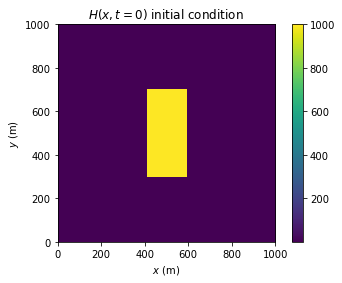

In [5]:
fig = plt.figure()
im1 = plt.imshow(H_2d.T, origin='lower', extent=(0, Lx, 0, Ly))
plt.title('$H(x, t=0)$ initial condition')
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
fig.colorbar(im1);

The diffusivity (`kappa_2d`) is also a 2D array, of shape `(nx, ny)`, here we set all values to a constant:

In [6]:
kappa_2d = np.zeros((nx, ny))
kappa_2d[:, :] = 1.0 

To solve the time dependent problem, we call a method from the module `dem_utils` called `diffusion_equation_perform_one_step()`. It advances the solution forward in time using either a provided time step, or by a time increment internally computed. Let's read the `help()` page to understand the arguments it needs.

In [7]:
help(dem_utils.diffusion_equation_perform_one_step)

Help on function diffusion_equation_perform_one_step in module dem_utils:

diffusion_equation_perform_one_step(dx, dy, kappa, T, source=None, dbc_left=None, dbc_right=None, dbc_top=None, dbc_bottom=None, dt_user=None, dt_max=1e+20)
    Performs a single time step of the time-dependent diffusion equation in 2-D, given by
      \partial T / \partial t = \div( k grad(T) ) + S
    The diffusion equation is solved using a finite difference method in space and time.
    The finite difference grid consists of nx x ny FD cells.
    The discrete solution of the finite difference problem is defined at the center of each cell.
    Each cell in the finite difference grid has a physical size of dx x dy.
    
    Dirichlet boundary conditions are specified by setting one (or more) of 
      dbc_left, dbc_right, dbc_top, dbc_bottom 
    to a value of True. These parameters define which side of the domain will have an imposed
    Dirichlet boundary condition. 
    When a Dirichlet boundary condition i

To use `diffusion_equation_perform_one_step()`, we need to do several things.
Firstly, `diffusion_equation_perform_one_step()` needs to be called from within a loop.
The loop essentially steps the discrete solution forward in time, in time increments `dt`.
At the beginning of the loop, copy `H_2d` into `H_old` - represnting the value of $H$ 
at the previous time step. `H_old` is passed to `diffusion_equation_perform_one_step()` and a new
value for `H_2d` is returned. 
For visualization purposes, we also store the value of time (`time`). 
At the end of each iteration of the time loop, we increment the value of `time` by the time increment `dt`.
Below we put all those concepts together.

In [8]:
# Copy the initial condition.
H_2d = np.copy(H_ic)

# Initialize the time loop counter and time variable.
tk = 0
time = 0.0

# Evolve the solution forward in time by 99 time steps.
for tk in range(1, 100):
    H_old = np.copy(H_2d) # Copy the current value for H into an "old" variable.
                          # "old" means "previous time step".
    
    # Update the solution from time to time + dt
    dt, H_2d = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                dbc_left=True, dbc_right=True, dbc_top=True, dbc_bottom=True)
    
    # Increment the time variable by the time-step used.
    time += dt

    # Output some diagnostics.
    if tk % 10 == 0:
        print('  computed step', tk, 'time', time)

  computed step 10 time 610.3515625
  computed step 20 time 1220.703125
  computed step 30 time 1831.0546875
  computed step 40 time 2441.40625
  computed step 50 time 3051.7578125
  computed step 60 time 3662.109375
  computed step 70 time 4272.4609375
  computed step 80 time 4882.8125
  computed step 90 time 5493.1640625


Let's plot the solution at the final time.

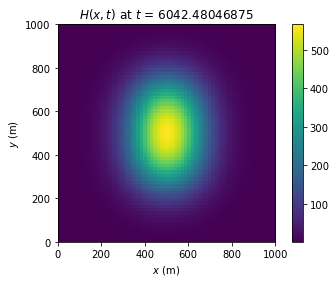

In [9]:
fig = plt.figure()
im1 = plt.imshow(H_2d.T, origin='lower', extent=(0, Lx, 0, Ly))
fig.colorbar(im1);
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('$H(x,t)$ at $t$ = ' + str(time));

To better understand the solution behavior, we need to look at the transients.
Let's run the simulation again, but this time generate profiles of the solution at $y \approx 500$ at different time instances.

  computed step 10 time 610.3515625
  computed step 20 time 1220.703125
  computed step 30 time 1831.0546875
  computed step 40 time 2441.40625
  computed step 50 time 3051.7578125
  computed step 60 time 3662.109375
  computed step 70 time 4272.4609375
  computed step 80 time 4882.8125
  computed step 90 time 5493.1640625


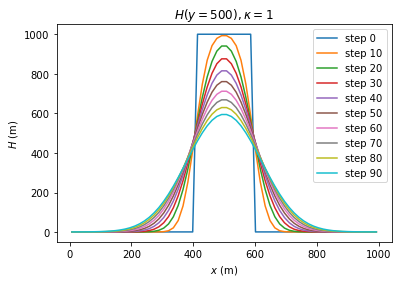

In [10]:
# Copy the initial condition.
H_2d = np.copy(H_ic)

# Initialize the time loop counter and time variable.
tk = 0
time = 0.0

# Create a figure for the temporal analysis / capture.
fig = plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$H$ (m)')
plt.title('$H(y = 500), \kappa=1$');

# Plot the initial condition.
plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));

# Evolve the solution forward in time by 99 time steps.
for tk in range(1, 100):
    H_old = np.copy(H_2d) # Copy the current value for H into an "old" variable.
                          # "old" means "previous time step".
    
    # Update the solution from time to time + dt.
    dt, H_2d = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                dbc_left=True, dbc_right=True, dbc_top=True, dbc_bottom=True)
    
    # Increment the time variable by the time-step used.
    time += dt

    # Output some diagnostics.
    if tk % 10 == 0:
        print('  computed step', tk, 'time', time)
        
        # Plot the solution at y ~ 500.
        plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));
        
plt.legend();        

Take home message: The diffusion equation smears out features. 
The initial condition ($H$ at step 0) was defined by a top hat function, but after several time steps the corners of the hat are completely removed and what is left behind is a nice smooth surface.

#### Diffusion in a box: Spatially variable diffusivity

We now examine the behaviour of $H$ when the diffusivity $\kappa$ is varies throughout the domain (and again $Q = 0$).

In [11]:
# Define an initial condition (similar to before, but use a square top-hat function).
for i in range(nx):
    for j in range(ny):
        H_2d[i, j] = 1.0
        if np.abs(x_1d[i] - 500.0) < 200.0:
            if np.abs(y_1d[j] - 500.0) < 200.0:
                H_2d[i, j] = 1000.0

H_ic = np.copy(H_2d)

To define a spatially variable diffusivity, the process is similar to the initial condition (above). Loop over the cells in `i` and `j` direction, and use the 1D coordinate arrays to define the spatial variation:

In [12]:
kappa_2d = np.zeros((nx, ny))

for i in range(nx):
    for j in range(ny):
        kappa_2d[i, j] = 1.0
        if x_1d[i] < 500.0:
            kappa_2d[i, j] = 1.0e-2 # Make the diffusivity on the left part of the domain 100 times smaller.

Now we evolve the initial condition forward in time. 
As before, we will capture the temporal behavior by plotting the solution along a transect over time, and then at the final step we will plot the solution over the complete domain.

  computed step 10 time 610.3515625
  computed step 20 time 1220.703125
  computed step 30 time 1831.0546875
  computed step 40 time 2441.40625
  computed step 50 time 3051.7578125
  computed step 60 time 3662.109375
  computed step 70 time 4272.4609375
  computed step 80 time 4882.8125
  computed step 90 time 5493.1640625


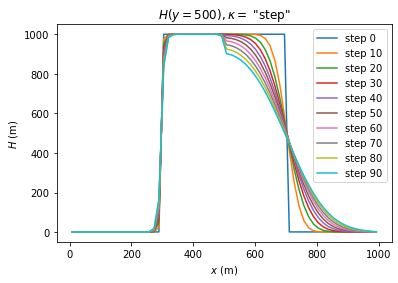

In [13]:
H_2d = np.copy(H_ic)

tk = 0
time = 0.0

fig = plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$H$ (m)')
plt.title('$H(y = 500), \kappa=$ "step"');

plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));

for tk in range(1, 100):
    H_old = np.copy(H_2d)
    dt, H_2d = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                dbc_left=True, dbc_right=True, dbc_top=True, dbc_bottom=True)
    time += dt
    if tk % 10 == 0:
        print('  computed step', tk, 'time', time)
        
        plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));
        
plt.legend();        

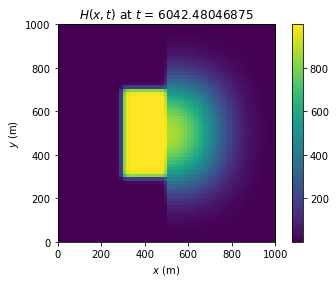

In [14]:
fig = plt.figure()
im1 = plt.imshow(H_2d.T, origin='lower', extent=(0, Lx, 0, Ly))
fig.colorbar(im1);
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('$H(x,t)$ at $t$ = ' + str(time));

Visually, we see that where the diffusivity is very small (left side of the domain), the initial solution (a "top hat" function) does not change much with time (it remains essentially a "top hat").
In contrast, in regions where the diffusivity is large ($x > 500$), the solution experiences significant diffusion / smearing over time. So in conclusion, the larger the diffusivity, the faster the solution diffuses away.

#### Diffusion-less case ($\kappa = 0$) with non-zero source $Q$

We now explore the role of the source term $Q$. As a prelude, we consider the case when actually $\kappa = 0$, i.e. when there is NO diffusion at all. In this case, our diffusion equation becomes

$$
\frac{\partial H}{\partial t} = Q(\mathbf x).
$$

When $Q$ independent of time (but still a function of space, $\mathbf x$), this equation is easy to solve.
Integerating in time, we find that the solution is 

$$
H(\mathbf x, t) = H_0(\mathbf x) + Q(\mathbf x) t,
$$

where $H_0(\mathbf x)$ is the initial condition. 
What this solution tells us is that $H$ will increase indefinite if $Q > 0$ (or decrease indefinitely if $Q < 0$) for all time $t$.

#### Diffusion in a box with a constant source $Q$

We now conduct a similar numerical experiments as tbefore, however this time we introduce a non-zero source term.
One thing I want to highlight here is the long time behavior of $H$.
For this reason, we perform many more time-steps and also output the diagnostics much less frequently.
We define the initial condition for $H$ and $\kappa$ again.

In [15]:
# Define the domain size.
Lx = 1000.0
Ly = 1000.0

nx = 24 # Number of FD cells in x.
ny = 24 # Number of FD cells in y.

# Compute the size of each FD cell.
dx = Lx / float(nx)
dy = Ly / float(ny)

# Create the 1D of x, y coordinates.
x_1d = np.linspace(0.5 * dx, Lx - 0.5 * dx, nx)
y_1d = np.linspace(0.5 * dy, Ly - 0.5 * dy, ny)

# Define the solution vector.
H_2d = np.zeros((nx, ny))

# Define an initial condition (similar to before, but use a square top-hat function).
for i in range(nx):
    for j in range(ny):
        H_2d[i, j] = 1.0
        if np.abs(x_1d[i] - 500.0) < 200.0:
            if np.abs(y_1d[j] - 500.0) < 200.0:
                H_2d[i, j] = 1000.0

H_ic = np.copy(H_2d)

# Define kappa (constant).
kappa_2d = np.zeros((nx, ny))
kappa_2d[:, :] = 1.0 

Now for the source term $Q$ (`source_2d`). For simplicity we set it equal to a constant of 0.04.

In [16]:
# Define the source Q (constant).
source_2d = np.zeros((nx, ny))
source_2d[:, :] = 0.04

The structure of the time loop is indentical as before.
The only new addition is we inform `dem_utils.diffusion_equation_perform_one_step()` of the source term with the argument `source=source_2d`. We'll plot transects at $y = 500$ throughout time to examine the solution.

  computed step 2000 time 41304.399679939685
  computed step 4000 time 71712.43268000566
  computed step 6000 time 99450.43769509069
  computed step 8000 time 126016.36319109157
  computed step 10000 time 151986.05558102127
  computed step 12000 time 177632.82086854297


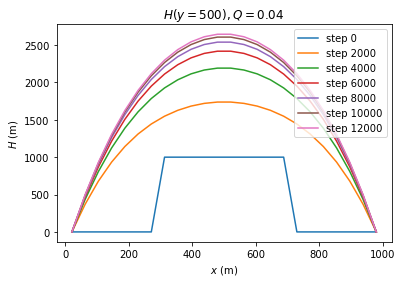

In [17]:
H_2d = np.copy(H_ic)

tk = 0
time = 0.0

fig = plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$H$ (m)')
plt.title('$H(y = 500), Q = 0.04$');
plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));

for tk in range(1, 14000):
    H_old = np.copy(H_2d)
    dt, H_2d = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                source=source_2d,  # Provide a non-zero source
                                                dbc_left=True, dbc_right=True, dbc_top=True, dbc_bottom=True)
    time += dt
    if tk % 2000 == 0: # Output
        print('  computed step', tk, 'time', time)        
        plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));
        
plt.legend(loc='upper right');

Recall that (i) the diffusion equation smears solutions as time increases and (ii) when $\kappa = 0, Q \ne 0$, the solution should grow indefinitely as time increases. 
What we observe in this experiment is that as time increases, the solution for $H$ no longer changes in time (compare the pink curve with the brown curve in the figure above).
When this occurs, the solution is said to be in a **steady-state**, which mathematically means implies that 

$$
\frac{\partial H}{\partial t} = 0.
$$

In this experiment, the steady-state represents a balance between diffusion (smearing / smoothing) which reduces the magnitude of the initial condition, and the source term which increases the value of $H$ over time (relative to the intial condition). In the experiment with $Q = 0.04$, in the long time state, the source term results in a final solution for $H$ which has been smoothed (diffused) with respect the intial condition (blue line in the figure above), but the steady-state solution is larger than the initial condition. Due to this, one might say that the source term dominates the solution.

Let's re-do the experiment using $Q = 0.01$.

  compute step 100 time 660.5219786161864
  compute step 200 time 4334.129612766114
  compute step 300 time 12466.340964955123
  compute step 400 time 18957.505020392255
  compute step 500 time 24791.50082912718
  compute step 600 time 30357.607896257876
  compute step 700 time 35783.849564779186
  compute step 800 time 41126.69369654084
  compute step 900 time 46414.92125241485


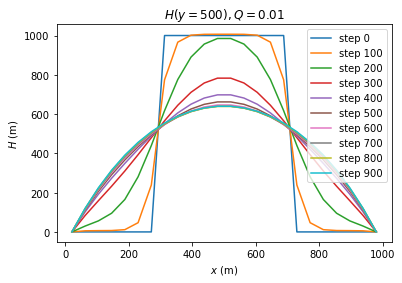

In [18]:
# Define the source Q (constant).
source_2d = np.zeros((nx, ny))
source_2d[:, :] = 0.01

H_2d = np.copy(H_ic)

tk = 0
time = 0.0

fig = plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$H$ (m)')
plt.title('$H(y = 500), Q = 0.01$');
plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));

for tk in range(1, 1000):
    H_old = np.copy(H_2d)
    dt, H_2d = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                source=source_2d,  # Provide a non-zero source
                                                dbc_left=True, dbc_right=True, dbc_top=True, dbc_bottom=True)
    time += dt
    if tk % 100 == 0: # Output
        print('  compute step', tk, 'time', time)        
        plt.plot(x_1d, H_2d[:, int(ny/2)], label='step ' + str(tk));
        
plt.legend(loc='upper right');

With a 4x smaller value of the source $Q$, in the long time behavior of $H$ also approaches a steady-state. 
The steady-state solution is again smoothed (with respect to the intial condition), but lower than the initial condition. Accordingly, we one might say that the diffusion term dominates the solution.

Now that we understand the basic solution behavior of the 2D diffusion equation with spatially variable diffusivity and non-zero source terms, we move on to applying this partial differential equation to study landscape evolution.

<a id='sec-lem'></a>

### 5. A Landscape Evolution  Model (LEM)

Landscape Evolution Models (LEMs) are concerned with defining the evolution of topography $H$, in response to tectonic and climatic forcing. Tectnonic forcing may include uplift, extension or compression. Climatic forcing includes processes such as wind, rain and snow. 
By "topographic response" we are primarily referring to erosion - the act of removing soil / rock from one location and transporting it to another location.
How the topography responds to external forces depends on the material present at and near to the surface. 
For example, a sedimentary layer will be much easier to erode than bedrock. Defining a physical process which models erosion is challenging. In the LEM below, we will only consider erosion due to rivers (fluvial incision) and hillslope processes.

Hillslope processes are commonly represented by a *linear diffusion term* (Ahnert, 1967; Roering, 2008).
The stream power law model has been widely used to represent erosion by rivers (Whipple & Tucker, 1999).
As fluvial incision leads to the formation of hillslopes along river channels, 
the two processes are inter-relatd, and therefore should be combined into a single landscape evolution model.

The Landscape Evolution Model (LEM) used here is

$$
\frac{\partial H}{\partial t} = \frac{\partial}{\partial x}\left( \kappa \frac{\partial H}{\partial x} \right)
+ \frac{\partial}{\partial y}\left( \kappa \frac{\partial H}{\partial y} \right) + U - K A^M |S|^N,
$$

where $\kappa$ is the hillslope sediment transport coefficient (m$^2$/s), $U$ is the tectonic uplift velocity (m/s), $K$ is the fluvial erosion (or "erodibility") coefficient (m$^{(1-2M)}$/s), $A$ is the upstream drainage area (m$^2$), $S$ is the local upstream slope (dimensionless) and $M, N$ are non-dimensional exponents. 

1. The term on the left-hand side (LHS) is known as the "erosion rate".
2. The first two terms on the right-hand side (RHS) involving $\kappa$ define erosion due to hillslope processes.
3. The term $K A^M |S|^N$ on the RHS represents fluvial erosion due to water flow (rain / rivers).

In the context of our generic diffusion equation, the source $Q$ for the SPM is 

$$
Q = U - K A^m |S|^n.
$$

In the previous lecture, we saw how to compute the upstream slope $S$.
For convenience, in the module `dem_utils`, we have provided a function `dem_utils.upstream_slope()` which does the same operation
We also used the D8 algorithm to accumulate the upstream cell count. 
Since all our FD cells have the same size, $A$, the upstream drainage area can be computed by multiplying the upstream cell count by the area of each FD cell, `dx * dy`. 

As a closing example to bring all the concepts about drainage networks & upstream slope from the previous lecture, and our understanding of the diffusion equation. 
We now take all our tools to build simplified erosion scenario consisting of a sedimentary fan at the base of an initially 1000 m high plateau

The model domain is defined by a rectangle of size $5000 \times 10000$ m$^2$.

In [19]:
# Define the domain size.
Lx = 1.0e4/2.0  # m
Ly = 1.0e4      # m

ny = 128 # Number of FD cells in y.
nx = int(ny/2) # Number of FD cells in x.
ncells = nx * ny

# Compute the size of each FD cell.
dx = Lx / float(nx)
dy = Ly / float(ny)

# Create the 1D of x, y coordinates.
x_1d = np.linspace(0.5 * dx, Lx - 0.5 * dx, nx)
y_1d = np.linspace(0.5 * dy, Ly - 0.5 * dy, ny)

The initial condition for $H$ involves shallow dipping plane and large step in height for $y > 5000$ when $H = 1000$ m. To initiate fluvial erosion, a smaller component of random noise (magnitude `delta_H = 1`) is also applied to the initial condition. This example assumes that $U$ the tectonic uplift is zero.

In [20]:
# Define an initial condition for H.
np.random.seed(0)
delta_H = 1.0
H_2d = delta_H * np.random.random((nx, ny)) # IC
for j in range(ny):
    for i in range(nx):
        if j > int(ny/2):
            H_2d[i, j] += 1.0e3
        else:
            H_2d[i, j] += j * dy/30.0

H_ic = np.copy(H_2d)

# Create the diffusivity and source term (these are assigned values in the time loop).
kappa_2d = np.zeros((nx, ny))
source_2d = np.zeros((nx, ny))

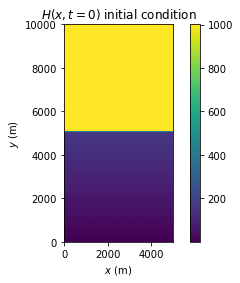

In [21]:
# Plot the initial condition.
fig = plt.figure()
im1 = plt.imshow(H_ic.T, origin='lower', extent=(0, Lx, 0, Ly))
plt.title('$H(x, t=0)$ initial condition')
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
fig.colorbar(im1);

The time loop required the LEM is similar to the numerical experiment involving a non-zero source term.
A few additions are made to incorporate the calculation of the drainage area and the upstrem slope which are required to compute the fluvial erosion.

In [22]:
# Require cell neighbors to compute the drainage area.
cell_neighbors = dem_utils.get_cell_neighbors_cart(nx, ny)

param_kappa = 1.5e-2 # m^2 / yr
param_K = 1.5e-3 # m^{1-2M} / yr
param_M = 0.4
param_N = 1.0

tk = 0
time = 0.0

H_2d = np.copy(H_ic)

for tk in range(1, 300):
    H_old = np.copy(H_2d)
    H_old_f = H_old.T.flatten()

    # Require down-stream receiver to compute the drainage area.
    recv = dem_utils.determine_receiver(cell_neighbors, H_old_f)

    # Perform upstream accumulation (required to compute the drainage area).
    upstream_cell_count = dem_utils.flow_accumulate(recv, H_old_f)

    drainage_area = upstream_cell_count * dx * dy # m^2
    drainage_area = np.reshape(drainage_area, (ny, nx)).T

    # Required to compute the fluvial erosion term S (slope).
    slope = dem_utils.upstream_slope(x_1d, y_1d, recv, H_old_f)
    slope = np.reshape(slope, (ny, nx)).T

    kappa_2d[:,:] = param_kappa
    
    # Calculate the source term Q - note that here no uplift is applied.
    source_2d[:,:] = -param_K * (drainage_area**param_M) * (slope**param_N)

    dt, H_new = dem_utils.diffusion_equation_perform_one_step(dx, dy, kappa_2d, H_old,
                                                source=source_2d,  # Provide a non-zero source
                                                dbc_bottom=True, dt_user=50.0)
    # Compute the erosion rate.
    erosion_rate_2d = (H_new - H_old) / dt
        
    H_2d = np.copy(H_new)
    
    time += dt
    if tk % 50 == 0: # Output
        print('  computed step', tk, 'time', time)        

  computed step 50 time 2500.0
  computed step 100 time 5000.0
  computed step 150 time 7500.0
  computed step 200 time 10000.0
  computed step 250 time 12500.0


At the final time, we plot the elevation $H$, the erosion rate $\dot{e}$, the drainage area $A$ and the fluvial erosion term $k_f = K A^M |S|^N$.

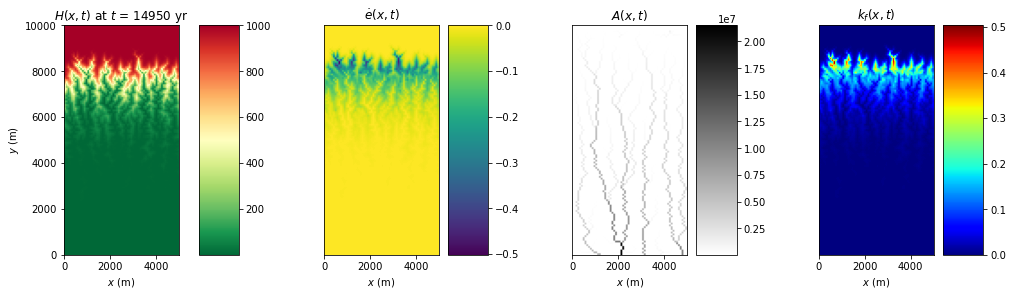

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 4), constrained_layout=True)

im1 = ax1.imshow(H_2d.T, origin='lower', extent=(0, Lx, 0, Ly), cmap=plt.cm.RdYlGn_r)
fig.colorbar(im1, ax=ax1);
ax1.set(xlabel='$x$ (m)', ylabel='$y$ (m)', title='$H(x,t)$ at $t$ = ' + str(round(time)) + ' yr')

im2 = ax2.imshow(erosion_rate_2d.T, origin='lower', extent=(0, Lx, 0, Ly))
fig.colorbar(im2, ax=ax2);
ax2.set(xlabel='$x$ (m)', title='$\dot{e}(x,t)$')
ax2.set(yticks=[])

im3 = ax3.imshow(drainage_area.T, origin='lower', extent=(0, Lx, 0, Ly), cmap='binary')
fig.colorbar(im3, ax=ax3);
ax3.set(xlabel='$x$ (m)', title='$A(x,t)$')
ax3.set(yticks=[])

im3 = ax4.imshow(-source_2d.T, origin='lower', extent=(0, Lx, 0, Ly), cmap='jet')
fig.colorbar(im3, ax=ax4);
ax4.set(xlabel='$x$ (m)', title='$k_f(x,t)$')
ax4.set(yticks=[]);

What is observed after simulating approximtely 10,000 years of hillslope and fluvial erosion is the development and propagation of an "erosion front" which eats away (in the positive y direction) the initial 1 km plateau.
The inclusion of the fluvial erosion is highly efficient at removing material and transporting it out of the bottom of the domain. This is highlighted by the presence of channel formation within the landscape $H$, and also evident in the computed drainage area ($A$).

### References


1. For further background on using a linear diffusion equation to model to hillslope erosion, please refer to:    
    - Ahnert, Frank. "The role of the equilibrium concept in the interpretation of landforms of fluvial erosion and deposition." L’evolution des Versants (1967): 23-41.
    - Roering, J.J., 2008. "How well can hillslope evolution models “explain” topography? Simulating soil transport and production with high-resolution topographic data", Geological Society of America Bulletin.


2. For further background on fluvial erosion, please refer to:  
    - Whipple, K.X. and Tucker, G.E., 1999. "Dynamics of the stream‐power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs", Journal of Geophysical Research: Solid Earth.


3. FastScape: A very efficient landscape evolution modelling toolkit. Python, C, Fortran tools available.  
    https://fastscape.org


4. LandLab: A python toolkit for modeling earth surface processes  
https://landlab.github.io

----

### Finite difference method in 1D

Given a function $f(s)$, the first derivative $f^{'}(s + \tfrac{1}{2}\Delta s) = \partial f / \partial s$ may be approximated as

$$
    \frac{\partial f}{\partial s} \approx \frac{f(s + \Delta s) - f(s)}{\Delta s}.
$$

The second derivative can be approximated as

$$
    f^{''}(s) = \frac{1}{\Delta s} \left[ f^{'}(s + \tfrac{1}{2}\Delta s) - f^{'}(s - \tfrac{1}{2}\Delta s) \right] \\
    = 
    \frac{1}{\Delta s} \left[ \left( \frac{f(s + \Delta s) - f(s)}{\Delta s} \right) 
    - \left( \frac{f(s ) - f(s-\Delta s)}{\Delta s}\right) \right],
$$

and finally

$$
    f^{''}(s)
    = \frac{1}{\Delta s^2} \left[ f(s + \Delta s) - 2f(s) + f(s-\Delta s) \right].
$$

The FD scheme used in this lecture utilizes the above finite difference approximations for both the time derivatives and the space derivatices.

**FD in time**

Let $H(x, t_k + \Delta t)$ by $H^{k+1}$ and $H(x, t_k)$ by $H^{k}$. The semi-discrete is then given by:

$$
\frac{H^{k+1} - H^k}{\Delta t} = \frac{\partial}{\partial x}\left( \kappa(x, t^k) \frac{\partial H}{\partial x} \right) + S(t^k).
$$

**FD in space** 

Let the domain be given by $\Omega \equiv [x_A, x_B]$. For the FD apporximation, $\Omega$ is divided into $N_x$ cells. The size of each cell is denoted by $\Delta x$, given by

$$
\Delta x = \frac{x_B - x_A}{N_x}.
$$

The solution $H$ is approximated at each cell center. The coordinate of each cell center is given by 

$$
x_i = x_A + \tfrac{1}{2} \Delta x + i \Delta x, \qquad 0 \le i \le N_x -1.
$$

Let $H(x_i, t_k)$ be the approximate solution of $H$ at position $x_i$ and time $t_k$, and denoted as $H_i^k$.

For clarity, we first right the semi-discrete problem in terms of a flux, $q = \kappa \tfrac{\partial H}{\partial x}$:

$$
\frac{H^{k+1}_i - H^k_i}{\Delta t} = \frac{\partial q_i}{\partial x}  + S(x_i, t^k).
$$

Using the second derivative estimate we have

$$
\frac{H^{k+1}_i - H^k_i}{\Delta t} \approx \frac{1}{\Delta x}\left( q_{i+\tfrac{1}{2}}^k - q_{i-\tfrac{1}{2}}^k \right) + S(t^k),
$$

where 

$$
q_{i+\tfrac{1}{2}}^k = q(x_i + \tfrac{1}{2} \Delta x, t_k ) \approx \kappa_{i+\tfrac{1}{2}} \left( \frac{H_i+1^k - H_i^k}{\Delta x} \right), \qquad
q_{i-\tfrac{1}{2}}^k = q(x_i - \tfrac{1}{2} \Delta x, t_k ) \approx \kappa_{i-\tfrac{1}{2}} \left( \frac{H_i^k - H_{i-1}^k}{\Delta x} \right).
$$

 

Since $x_i$ is defined as the cell center, locations $x_i \pm \tfrac{1}{2} \Delta x$ correspond to a cell face.